In [41]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from astropy.table import QTable, Table, Column
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as MAE

In [17]:
GSK = pd.read_csv('data/GSK.csv',index_col=0, parse_dates=True)
JNJ = pd.read_csv('data/JNJ.csv',index_col=0, parse_dates=True)
MRK = pd.read_csv('data/MRK.csv',index_col=0, parse_dates=True)
PFE = pd.read_csv('data/PFE.csv',index_col=0, parse_dates=True)
SNY = pd.read_csv('data/SNY.csv',index_col=0, parse_dates=True)

In [18]:
GSK

,Adj Close,Virus,Flu,Vaccine
Date,,,,
2010-11-01,22.901985,5,12,13
2010-12-01,23.464359,5,16,9
2011-01-01,21.735352,5,18,12
2011-02-01,23.099413,5,13,12
2011-03-01,23.348209,5,9,13
...,...,...,...,...
2020-07-01,39.345814,9,22,67
2020-08-01,38.643208,6,18,62
2020-09-01,37.163372,5,28,63


In [19]:
GSK['Flu'][0]

12

In [20]:
def base_prediction(stock):
    predict_list = []

    for index_i in stock.index:
        
        #use loc and iloc to get the prior date
        loc1 = stock.index.get_loc(index_i)
        if(loc1<20):continue
        predictor = [stock.iloc[loc1 - 1]['Adj Close'],stock.iloc[loc1 - 1]['Adj Close']]
        predictor = np.array(predictor)
        predictor = predictor.reshape(1,-1)
        #new list for variables and values for linear regression
        X = []
        Y = []
        for index_j, rows in (stock[(stock.index<index_i)]).iterrows():
            loc2 = stock.index.get_loc(index_j)
            if(loc2<17):continue
            predictors = [stock.iloc[loc2-1]['Adj Close'],stock.iloc[loc1 - 12]['Adj Close']]
            X.append(predictors)
            actual = stock.loc[index_j]['Adj Close']
            Y.append(actual)
        #predictors and actual values in rolling window
        X = np.array(X)
        Y = np.array(Y)
        #optimal parameters from OLS
        linreg = LinearRegression()

        linreg.fit(X, Y)
        #predicted values    
        pre = linreg.predict(predictor)[0]
        predict_list.append(pre)
    
    return predict_list

In [21]:
GSK_base = base_prediction(GSK)
JNJ_base = base_prediction(JNJ)
MRK_base = base_prediction(MRK)
PFE_base = base_prediction(PFE)
SNY_base = base_prediction(SNY)

In [22]:
len(GSK_base)

101

In [23]:
GSK_actual = GSK['Adj Close'][20:]
JNJ_actual = JNJ['Adj Close'][20:]
MRK_actual = MRK['Adj Close'][20:]
PFE_actual = PFE['Adj Close'][20:]
SNY_actual = SNY['Adj Close'][20:]

In [24]:
len(GSK_actual)

101

In [44]:
MAE_GSK_b = MAE(GSK_base,GSK_actual)
MAE_JNJ_b = MAE(JNJ_base,JNJ_actual)
MAE_MRK_b = MAE(MRK_base,MRK_actual)
MAE_PFE_b = MAE(PFE_base,PFE_actual)
MAE_SNY_b = MAE(SNY_base,SNY_actual)

In [25]:
[MAE(GSK_base,GSK_actual),MAE(JNJ_base,JNJ_actual),MAE(MRK_base,MRK_actual),MAE(PFE_base,PFE_actual),MAE(SNY_base,SNY_actual)]

[1.8112595233241895,
 4.630397906989462,
 3.2168021288151247,
 2.1070952117529576,
 2.4616895043763165]

In [26]:
def virus_prediction(stock):
    predict_list = []

    for index_i in stock.index:
        
        #use loc and iloc to get the prior date
        loc1 = stock.index.get_loc(index_i)
        if(loc1<20):continue
        predictor = [stock.iloc[loc1 - 1]['Adj Close'],stock.iloc[loc1 - 12]['Adj Close'],stock.iloc[loc1]['Virus']]
        predictor = np.array(predictor)
        predictor = predictor.reshape(1,-1)
        #new list for variables and values for linear regression
        X = []
        Y = []
        for index_j, rows in (stock[(stock.index<index_i)]).iterrows():
            loc2 = stock.index.get_loc(index_j)
            if(loc2<17):continue
            predictors = [stock.iloc[loc2-1]['Adj Close'],stock.iloc[loc2-12]['Adj Close'],stock.iloc[loc2]['Virus']]
            X.append(predictors)
            actual = stock.loc[index_j]['Adj Close']
            Y.append(actual)
        #predictors and actual values in rolling window
        X = np.array(X)
        Y = np.array(Y)
        #optimal parameters from OLS
        linreg = LinearRegression()

        linreg.fit(X, Y)
        #predicted values    
        pre = linreg.predict(predictor)[0]
        predict_list.append(pre)
    
    return predict_list

In [27]:
GSK_virus = virus_prediction(GSK)
JNJ_virus = virus_prediction(JNJ)
MRK_virus = virus_prediction(MRK)
PFE_virus = virus_prediction(PFE)
SNY_virus = virus_prediction(SNY)

In [49]:
MAE_GSK_vi = MAE(GSK_virus,GSK_actual)
MAE_JNJ_vi = MAE(JNJ_virus,JNJ_actual)
MAE_MRK_vi = MAE(MRK_virus,MRK_actual)
MAE_PFE_vi = MAE(PFE_virus,PFE_actual)
MAE_SNY_vi = MAE(SNY_virus,SNY_actual)

In [28]:
[MAE(GSK_virus,GSK_actual),MAE(JNJ_virus,JNJ_actual),MAE(MRK_virus,MRK_actual),MAE(PFE_virus,PFE_actual),MAE(SNY_virus,SNY_actual)]

[1.6892755270307964,
 4.171855993252013,
 2.9738224943323974,
 1.379771056976068,
 2.4429224396274174]

In [29]:
def flu_prediction(stock):
    predict_list = []

    for index_i in stock.index:
        
        #use loc and iloc to get the prior date
        loc1 = stock.index.get_loc(index_i)
        if(loc1<20):continue
        predictor = [stock.iloc[loc1 - 1]['Adj Close'],stock.iloc[loc1 - 12]['Adj Close'],stock.loc[index_i]['Flu']]
        predictor = np.array(predictor)
        predictor = predictor.reshape(1,-1)
        #new list for variables and values for linear regression
        X = []
        Y = []
        for index_j, rows in (stock[(stock.index<index_i)]).iterrows():
            loc2 = stock.index.get_loc(index_j)
            if(loc2<17):continue
            predictors = [stock.iloc[loc2-1]['Adj Close'],stock.iloc[loc2-12]['Adj Close'],stock.loc[index_j]['Flu']]
            X.append(predictors)
            actual = stock.loc[index_j]['Adj Close']
            Y.append(actual)
        #predictors and actual values in rolling window
        X = np.array(X)
        Y = np.array(Y)
        #optimal parameters from OLS
        linreg = LinearRegression()

        linreg.fit(X, Y)
        #predicted values    
        pre = linreg.predict(predictor)[0]
        predict_list.append(pre)
    
    return predict_list

In [30]:
GSK_flu = flu_prediction(GSK)
JNJ_flu = flu_prediction(JNJ)
MRK_flu = flu_prediction(MRK)
PFE_flu = flu_prediction(PFE)
SNY_flu = flu_prediction(SNY)

In [48]:
MAE_GSK_f = MAE(GSK_flu,GSK_actual)
MAE_JNJ_f = MAE(JNJ_flu,JNJ_actual)
MAE_MRK_f = MAE(MRK_flu,MRK_actual)
MAE_PFE_f = MAE(PFE_flu,PFE_actual)
MAE_SNY_f = MAE(SNY_flu,SNY_actual)

In [31]:
[MAE(GSK_flu,GSK_actual),MAE(JNJ_flu,JNJ_actual),MAE(MRK_flu,MRK_actual),MAE(PFE_flu,PFE_actual),MAE(SNY_flu,SNY_actual)]

[1.4590530458603084,
 3.8692969757965523,
 2.760850502226266,
 1.2592857655796432,
 2.2088375066842567]

In [32]:
def vaccine_prediction(stock):
    predict_list = []

    for index_i in stock.index:
        
        #use loc and iloc to get the prior date
        loc1 = stock.index.get_loc(index_i)
        if(loc1<20):continue
        predictor = [stock.iloc[loc1 - 1]['Adj Close'],stock.iloc[loc1 - 12]['Adj Close'],stock.loc[index_i]['Vaccine']]
        predictor = np.array(predictor)
        predictor = predictor.reshape(1,-1)
        #new list for variables and values for linear regression
        X = []
        Y = []
        for index_j, rows in (stock[(stock.index<index_i)]).iterrows():
            loc2 = stock.index.get_loc(index_j)
            if(loc2<17):continue
            predictors = [stock.iloc[loc2-1]['Adj Close'],stock.iloc[loc2-12]['Adj Close'],stock.loc[index_j]['Vaccine']]
            X.append(predictors)
            actual = stock.loc[index_j]['Adj Close']
            Y.append(actual)
        #predictors and actual values in rolling window
        X = np.array(X)
        Y = np.array(Y)
        #optimal parameters from OLS
        linreg = LinearRegression()

        linreg.fit(X, Y)
        #predicted values    
        pre = linreg.predict(predictor)[0]
        predict_list.append(pre)
    
    return predict_list

In [33]:
GSK_vaccine = vaccine_prediction(GSK)
JNJ_vaccine = vaccine_prediction(JNJ)
MRK_vaccine = vaccine_prediction(MRK)
PFE_vaccine = vaccine_prediction(PFE)
SNY_vaccine = vaccine_prediction(SNY)

In [47]:
MAE_GSK_va = MAE(GSK_vaccine,GSK_actual)
MAE_JNJ_va = MAE(JNJ_vaccine,JNJ_actual)
MAE_MRK_va = MAE(MRK_vaccine,MRK_actual)
MAE_PFE_va = MAE(PFE_vaccine,PFE_actual)
MAE_SNY_va = MAE(SNY_vaccine,SNY_actual)

In [34]:
[MAE(GSK_vaccine,GSK_actual),MAE(JNJ_vaccine,JNJ_actual),MAE(MRK_vaccine,MRK_actual),MAE(PFE_vaccine,PFE_actual),MAE(SNY_vaccine,SNY_actual)]

[1.5237651442956213,
 4.000515336659175,
 2.6515468598890406,
 1.3276300184671426,
 2.1787100353097975]

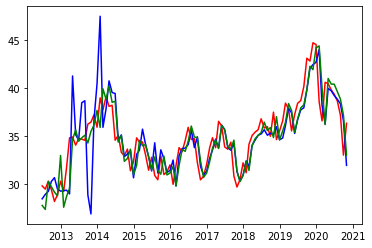

In [35]:
plt.plot(GSK.index[20:],GSK_actual,'r')
plt.plot(GSK.index[20:],GSK_base,'b')
plt.plot(GSK.index[20:],GSK_vaccine,'g')

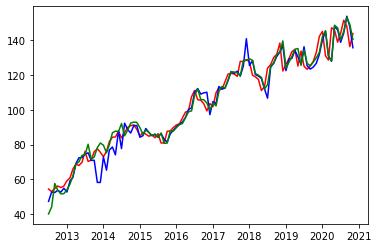

In [36]:
plt.plot(JNJ.index[20:],JNJ_actual,'r')
plt.plot(JNJ.index[20:],JNJ_base,'b')
plt.plot(JNJ.index[20:],JNJ_vaccine,'g')

In [37]:
def trends_prediction(stock):
    predict_list = []

    for index_i in stock.index:
        
        #use loc and iloc to get the prior date
        loc1 = stock.index.get_loc(index_i)
        if(loc1<20):continue
        predictor = [stock.iloc[loc1 - 1]['Adj Close'],stock.iloc[loc1 - 12]['Adj Close'],stock.iloc[loc1]['Vaccine'],stock.iloc[loc1]['Virus'],stock.iloc[loc1]['Flu']]
        predictor = np.array(predictor)
        predictor = predictor.reshape(1,-1)
        #new list for variables and values for linear regression
        X = []
        Y = []
        for index_j, rows in (stock[(stock.index<index_i)]).iterrows():
            loc2 = stock.index.get_loc(index_j)
            if(loc2<17):continue
            predictors = [stock.iloc[loc2 - 1]['Adj Close'],stock.iloc[loc2 - 12]['Adj Close'],stock.iloc[loc2]['Vaccine'],stock.iloc[loc2]['Virus'],stock.iloc[loc2]['Flu']]
            X.append(predictors)
            actual = stock.loc[index_j]['Adj Close']
            Y.append(actual)
        #predictors and actual values in rolling window
        X = np.array(X)
        Y = np.array(Y)
        #optimal parameters from OLS
        linreg = LinearRegression()

        linreg.fit(X, Y)
        #predicted values    
        pre = linreg.predict(predictor)[0]
        predict_list.append(pre)
    
    return predict_list

In [38]:
GSK_trends = trends_prediction(GSK)
JNJ_trends = trends_prediction(JNJ)
MRK_trends = trends_prediction(MRK)
PFE_trends = trends_prediction(PFE)
SNY_trends = trends_prediction(SNY)

In [43]:
MAE_GSK_t = MAE(GSK_trends,GSK_actual)
MAE_JNJ_t = MAE(JNJ_trends,JNJ_actual)
MAE_MRK_t = MAE(MRK_trends,MRK_actual)
MAE_PFE_t = MAE(PFE_trends,PFE_actual)
MAE_SNY_t = MAE(SNY_trends,SNY_actual)

In [39]:
[MAE(GSK_trends,GSK_actual),MAE(JNJ_trends,JNJ_actual),MAE(MRK_trends,MRK_actual),MAE(PFE_trends,PFE_actual),MAE(SNY_trends,SNY_actual)]

[1.760944622139652,
 4.770523501661599,
 3.0682858865549876,
 1.4961444789607843,
 2.4161944588198336]

In [50]:
# Compute 1-ratio
# virus
ratio_GSK_vi = (MAE_GSK_b-MAE_GSK_vi)/MAE_GSK_b *100
ratio_JNJ_vi = (MAE_JNJ_b-MAE_JNJ_vi)/MAE_GSK_b *100
ratio_MRK_vi = (MAE_MRK_b-MAE_MRK_vi)/MAE_MRK_b *100
ratio_PFE_vi = (MAE_PFE_b-MAE_PFE_vi)/MAE_PFE_b *100
ratio_SNY_vi = (MAE_SNY_b-MAE_SNY_vi)/MAE_SNY_b *100
# flu
ratio_GSK_f = (MAE_GSK_b-MAE_GSK_f)/MAE_GSK_b *100
ratio_JNJ_f = (MAE_JNJ_b-MAE_JNJ_f)/MAE_GSK_b *100
ratio_MRK_f = (MAE_MRK_b-MAE_MRK_f)/MAE_MRK_b *100
ratio_PFE_f = (MAE_PFE_b-MAE_PFE_f)/MAE_PFE_b *100
ratio_SNY_f = (MAE_SNY_b-MAE_SNY_f)/MAE_SNY_b *100
# vaccine
ratio_GSK_va = (MAE_GSK_b-MAE_GSK_va)/MAE_GSK_b *100
ratio_JNJ_va = (MAE_JNJ_b-MAE_JNJ_va)/MAE_GSK_b *100
ratio_MRK_va = (MAE_MRK_b-MAE_MRK_va)/MAE_MRK_b *100
ratio_PFE_va = (MAE_PFE_b-MAE_PFE_va)/MAE_PFE_b *100
ratio_SNY_va = (MAE_SNY_b-MAE_SNY_va)/MAE_SNY_b *100
# Trends
ratio_GSK_t = (MAE_GSK_b-MAE_GSK_t)/MAE_GSK_b *100
ratio_JNJ_t = (MAE_JNJ_b-MAE_JNJ_t)/MAE_GSK_b *100
ratio_MRK_t = (MAE_MRK_b-MAE_MRK_t)/MAE_MRK_b *100
ratio_PFE_t = (MAE_PFE_b-MAE_PFE_t)/MAE_PFE_b *100
ratio_SNY_t = (MAE_SNY_b-MAE_SNY_t)/MAE_SNY_b *100

In [51]:
# Compare the MAE value
data_rows = (['GSK', round(MAE(GSK_base,GSK_actual),5), round(MAE(GSK_virus,GSK_actual),5), round(MAE(GSK_flu,GSK_actual),5), round(MAE(GSK_vaccine,GSK_actual),5), round(MAE(GSK_trends,GSK_actual),5)],
             ['JNJ', round(MAE(JNJ_base,JNJ_actual),5), round(MAE(JNJ_virus,JNJ_actual),5), round(MAE(JNJ_flu,JNJ_actual),5), round(MAE(JNJ_vaccine,JNJ_actual),5), round(MAE(JNJ_trends,JNJ_actual),5)],
             ['MRK', round(MAE(MRK_base,MRK_actual),5), round(MAE(MRK_virus,MRK_actual),5), round(MAE(MRK_flu,MRK_actual),5), round(MAE(MRK_vaccine,MRK_actual),5), round(MAE(MRK_trends,MRK_actual),5)],
             ['PFE', round(MAE(PFE_base,PFE_actual),5), round(MAE(PFE_virus,PFE_actual),5), round(MAE(PFE_flu,PFE_actual),5), round(MAE(PFE_vaccine,PFE_actual),5), round(MAE(PFE_trends,PFE_actual),5)],
             ['SNY', round(MAE(SNY_base,SNY_actual),5), round(MAE(SNY_virus,SNY_actual),5), round(MAE(SNY_flu,SNY_actual),5), round(MAE(SNY_vaccine,SNY_actual),5), round(MAE(SNY_trends,SNY_actual),5)])
t1 = Table(rows=data_rows, names=('Stock', 'MAE_base', 'MAE_virus', 'MAE_flu', 'MAE_vaccine','MAE_trends'))
#print('       Behavio of MAE around Turning Points')
print(t1)

Stock MAE_base MAE_virus MAE_flu MAE_vaccine MAE_trends
----- -------- --------- ------- ----------- ----------
  GSK  1.81126   1.68928 1.45905     1.52377    1.76094
  JNJ   4.6304   4.17186  3.8693     4.00052    4.77052
  MRK   3.2168   2.97382 2.76085     2.65155    3.06829
  PFE   2.1071   1.37977 1.25929     1.32763    1.49614
  SNY  2.46169   2.44292 2.20884     2.17871    2.41619


In [52]:
# Compare the 1-ratio
data_rows = (['GSK', round(ratio_GSK_vi,2), round(ratio_GSK_f,2), round(ratio_GSK_va,2), round(ratio_GSK_t,2)],
             ['JNJ', round(ratio_JNJ_vi,2), round(ratio_JNJ_f,2), round(ratio_JNJ_va,2), round(ratio_JNJ_t,2)],
             ['MRK', round(ratio_MRK_vi,2), round(ratio_MRK_f,2), round(ratio_MRK_va,2), round(ratio_MRK_t,2)],
             ['PFE', round(ratio_PFE_vi,2), round(ratio_PFE_f,2), round(ratio_PFE_va,2), round(ratio_PFE_t,2)],
             ['SNY', round(ratio_SNY_vi,2), round(ratio_SNY_f,2), round(ratio_SNY_va,2), round(ratio_SNY_t,2)])
t2 = Table(rows=data_rows, names=('Stock', '1-ratio_virus', '1-ratio_flu', '1-ratio_vaccine','1-ratio_trends'))
#print('       Behavio of MAE around Turning Points')
print(t2)

Stock 1-ratio_virus 1-ratio_flu 1-ratio_vaccine 1-ratio_trends
----- ------------- ----------- --------------- --------------
  GSK          6.73       19.45           15.87           2.78
  JNJ         25.32       42.02           34.78          -7.74
  MRK          7.55       14.17           17.57           4.62
  PFE         34.52       40.24           36.99          28.99
  SNY          0.76       10.27            11.5           1.85


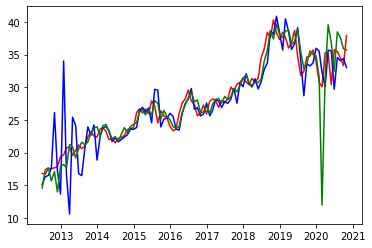

In [32]:
plt.plot(PFE.index[20:],PFE_actual,'r')
plt.plot(PFE.index[20:],PFE_base,'b')
plt.plot(PFE.index[20:],PFE_trends,'g')

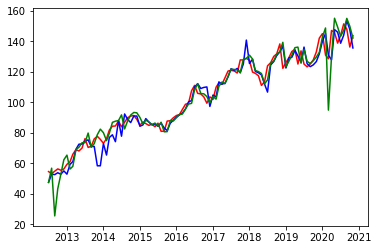

In [33]:
plt.plot(JNJ.index[20:],JNJ_actual,'r')
plt.plot(JNJ.index[20:],JNJ_base,'b')
plt.plot(JNJ.index[20:],JNJ_trends,'g')

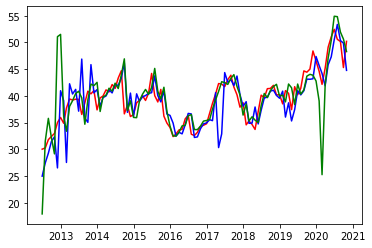

In [34]:
plt.plot(SNY.index[20:],SNY_actual,'r')
plt.plot(SNY.index[20:],SNY_base,'b')
plt.plot(SNY.index[20:],SNY_trends,'g')

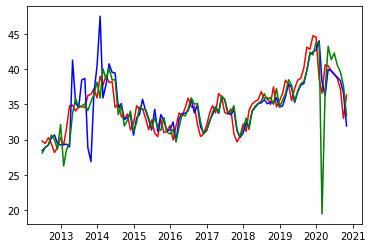

In [35]:
plt.plot(GSK.index[20:],GSK_actual,'r')
plt.plot(GSK.index[20:],GSK_base,'b')
plt.plot(GSK.index[20:],GSK_trends,'g')